In [1]:
%%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import random
from PIL import Image as im
from collections import Counter
from experiment import AtmLight, DarkChannel
from scipy.ndimage import gaussian_filter

def hazy(file, airlight):
    path = f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}.jpg"
    img = plt.imread(path)
    
    depth_path = f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}_depth.npy"
    depth_np = np.load(depth_path)
    depth_img = depth_np[0][0]
    depth_img = np.where(depth_img < depth_img.max()-depth_img.min(), depth_img-40, depth_img)
    depth_img = gaussian_filter(depth_img, sigma = 40)
    data = im.fromarray(depth_img)
    if data.mode != 'L':
        data = data.convert('L')
    data.save(f'/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}_depth.jpg')
    depth_img_path = f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}_depth.jpg"
    depth_img = plt.imread(depth_img_path)
    depth_img_3c = np.zeros_like(img)
    depth_img_3c[:,:,0] = depth_img
    depth_img_3c[:,:,1] = depth_img
    depth_img_3c[:,:,2] = depth_img
    norm_depth_img = depth_img_3c/255
    beta = 4.0
    trans = np.exp(-norm_depth_img*beta)
    A = airlight
    hazy = img*trans + A*(1-trans)
    hazy = np.array(hazy, dtype=np.uint8)
    return hazy # cv2.cvtColor(hazy, cv2.COLOR_BGR2RGB)


def f(a_light):
    # a_light = disk(int(a_light))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_hazy = hazy(file, airlight=a_light) 

    ax_neu.imshow(img_hazy)
    fig.canvas.draw()
    display(fig)

file = 'fe189115-11bedd21'
image = plt.imread(f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}.jpg")       

fig = plt.figure(figsize=(18, 15))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(image)
ax_neu.imshow(image)

In [2]:
interact(f, a_light=widgets.IntSlider(min=0,max=255,step=5,value=1))

interactive(children=(IntSlider(value=1, description='a_light', max=255, step=5), Output()), _dom_classes=('wi…

<function __main__.f(a_light)>

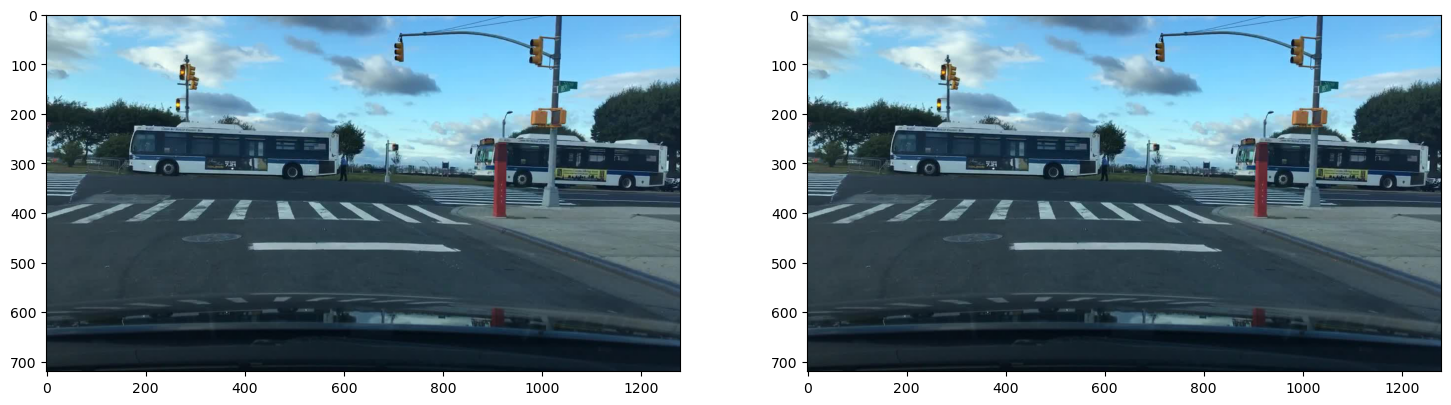

In [3]:
def hazy1(file, beta):
    path = f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}.jpg"
    img = plt.imread(path)
    
    depth_path = f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}_depth.npy"
    depth_np = np.load(depth_path)
    depth_img = depth_np[0][0]
    depth_img = np.where(depth_img < depth_img.max()-depth_img.min(), depth_img-40, depth_img)
    depth_img = gaussian_filter(depth_img, sigma = 40)
    data = im.fromarray(depth_img)
    if data.mode != 'L':
        data = data.convert('L')
    data.save(f'/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}_depth.jpg')
    depth_img_path = f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}_depth.jpg"
    depth_img = plt.imread(depth_img_path)
    depth_img_3c = np.zeros_like(img)
    depth_img_3c[:,:,0] = depth_img
    depth_img_3c[:,:,1] = depth_img
    depth_img_3c[:,:,2] = depth_img
    norm_depth_img = depth_img_3c/255
    beta = beta
    trans = np.exp(-norm_depth_img*beta)
    A = 180
    hazy = img*trans + A*(1-trans)
    hazy = np.array(hazy, dtype=np.uint8)
    return hazy # cv2.cvtColor(hazy, cv2.COLOR_BGR2RGB)


def f(beta):
    # a_light = disk(int(a_light))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        img_hazy = hazy1(file, beta=beta) 

    ax_neu.imshow(img_hazy)
    fig.canvas.draw()
    display(fig)

file = 'fe189115-11bedd21'
image = plt.imread(f"/home/roshini/AV_BadWeather/TransWeather/synthetic_fog/sample/bdd/{file}.jpg")       

fig = plt.figure(figsize=(18, 15))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(image)
ax_neu.imshow(image)

In [4]:
interact(f, beta=widgets.IntSlider(min=0,max=5,step=1,value=1))

interactive(children=(IntSlider(value=1, description='beta', max=5), Output()), _dom_classes=('widget-interact…

<function __main__.f(beta)>